In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [106]:
# Load the data from the csv file:
data = pd.read_csv("C:/Users/zeus/Desktop/Git Repositories/Road_Accidents/Road Accident Data.csv")

In [107]:
data.head(100)

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Longitude,Light_Conditions,Local_Authority_(District),...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,01-01-2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,-0.201349,Daylight,Kensington and Chelsea,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Clear,Cars
1,200901BS70002,05-01-2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,-0.199248,Daylight,Kensington and Chelsea,...,11,2,Metropolitan Police,Wet,Single carriageway,30,10:59,Urban,Clear,Cars
2,200901BS70003,04-01-2021,Sunday,Give way or uncontrolled,T or staggered junction,Minor,51.486668,-0.179599,Daylight,Kensington and Chelsea,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Clear,Cars
3,200901BS70004,05-01-2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,-0.203110,Daylight,Kensington and Chelsea,...,1,2,Metropolitan Police,Frosty,Single carriageway,30,08:10,Urban,Other,Heavy Motorcycles
4,200901BS70005,06-01-2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,-0.173445,Darkness,Kensington and Chelsea,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Clear,Cars
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,200901BS70122,04-03-2021,Wednesday,Auto traffic signal,T or staggered junction,Minor,51.486622,-0.170814,Daylight,Kensington and Chelsea,...,1,2,Metropolitan Police,Wet,Single carriageway,30,07:05,Urban,Clear,Cars
96,200901BS70123,07-02-2021,Saturday,Give way or uncontrolled,Crossroads,Minor,51.504966,-0.194000,Daylight,Kensington and Chelsea,...,1,1,Metropolitan Police,Dry,Single carriageway,30,13:15,Urban,Other,Cars
97,200901BS70124,17-03-2021,Tuesday,Auto traffic signal,Crossroads,Minor,51.495660,-0.173766,Darkness,Kensington and Chelsea,...,1,1,Metropolitan Police,Dry,Single carriageway,30,23:00,Urban,Clear,Cars
98,200901BS70126,24-02-2021,Tuesday,Give way or uncontrolled,T or staggered junction,Serious,51.490535,-0.173827,Daylight,Kensington and Chelsea,...,1,2,Metropolitan Police,Dry,Single carriageway,30,08:00,Urban,Clear,Public Transport


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Index              307972 non-null  object 
 1   Accident Date               307973 non-null  object 
 2   Day_of_Week                 307973 non-null  object 
 3   Junction_Control            307973 non-null  object 
 4   Junction_Detail             307973 non-null  object 
 5   Accident_Severity           307973 non-null  object 
 6   Latitude                    307973 non-null  float64
 7   Longitude                   307973 non-null  float64
 8   Light_Conditions            307973 non-null  object 
 9   Local_Authority_(District)  307973 non-null  object 
 10  Carriageway_Hazards         307973 non-null  object 
 11  Number_of_Casualties        307973 non-null  int64  
 12  Number_of_Vehicles          307973 non-null  int64  
 13  Police_Force  

In [109]:
data['Accident Date'] = pd.to_datetime(data['Accident Date'],format = "%d-%m-%Y")
# data['Time'] = pd.to_datetime(data['Time'],format='%H:%M',errors = 'coerce').dt.time

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Accident_Index              307972 non-null  object        
 1   Accident Date               307973 non-null  datetime64[ns]
 2   Day_of_Week                 307973 non-null  object        
 3   Junction_Control            307973 non-null  object        
 4   Junction_Detail             307973 non-null  object        
 5   Accident_Severity           307973 non-null  object        
 6   Latitude                    307973 non-null  float64       
 7   Longitude                   307973 non-null  float64       
 8   Light_Conditions            307973 non-null  object        
 9   Local_Authority_(District)  307973 non-null  object        
 10  Carriageway_Hazards         307973 non-null  object        
 11  Number_of_Casualties        307973 non-

In [111]:
data.isnull().sum()
# Data set has 1525 Null value in Road_Type column and 1 Accident_Index column which is null. 

Accident_Index                   1
Accident Date                    0
Day_of_Week                      0
Junction_Control                 0
Junction_Detail                  0
Accident_Severity                0
Latitude                         0
Longitude                        0
Light_Conditions                 0
Local_Authority_(District)       0
Carriageway_Hazards              0
Number_of_Casualties             0
Number_of_Vehicles               0
Police_Force                     0
Road_Surface_Conditions          0
Road_Type                     1525
Speed_limit                      0
Time                             0
Urban_or_Rural_Area              0
Weather_Conditions               0
Vehicle_Type                     0
dtype: int64

In [112]:
data['Road_Type'].replace('null', np.nan, inplace=True)
data['Road_Type'].fillna(data['Road_Type'].mode().iloc[0], inplace=True)

In [113]:
data.isnull().sum()

Accident_Index                1
Accident Date                 0
Day_of_Week                   0
Junction_Control              0
Junction_Detail               0
Accident_Severity             0
Latitude                      0
Longitude                     0
Light_Conditions              0
Local_Authority_(District)    0
Carriageway_Hazards           0
Number_of_Casualties          0
Number_of_Vehicles            0
Police_Force                  0
Road_Surface_Conditions       0
Road_Type                     0
Speed_limit                   0
Time                          0
Urban_or_Rural_Area           0
Weather_Conditions            0
Vehicle_Type                  0
dtype: int64

In [94]:
# extract the last 5 digits from the time column
# data['Time'] = data['Time'].apply(lambda x:x[-5:])

In [114]:
data.to_csv('C:/Users/zeus/Desktop/Git Repositories/Road_Accidents/Updated Road Accident Data.csv')

In [123]:
data = pd.read_csv('C:/Users/zeus/Desktop/Git Repositories/Road_Accidents/Updated Road Accident Data.csv')

In [116]:
data['Weather_Conditions'].value_counts()

Weather_Conditions
Clear      247644
Raining     38403
Other       14859
Snowy        5377
Foggy        1690
Name: count, dtype: int64

In [117]:
data['Vehicle_Type'].value_counts()

Vehicle_Type
Cars                       245337
Vans and Goods Vehicles     24729
Heavy Motorcycles           14511
Small Vehicles              10555
Public Transport             9507
Other vehicle                2516
Specialized Vehicles          752
Bicycle                        66
Name: count, dtype: int64

In [118]:
data.columns

Index(['Unnamed: 0', 'Accident_Index', 'Accident Date', 'Day_of_Week',
       'Junction_Control', 'Junction_Detail', 'Accident_Severity', 'Latitude',
       'Longitude', 'Light_Conditions', 'Local_Authority_(District)',
       'Carriageway_Hazards', 'Number_of_Casualties', 'Number_of_Vehicles',
       'Police_Force', 'Road_Surface_Conditions', 'Road_Type', 'Speed_limit',
       'Time', 'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type'],
      dtype='object')

In [119]:
data['Speed_limit'].value_counts()

Speed_limit
30    200040
60     46826
40     25650
70     22362
50     10191
20      2899
10         3
15         2
Name: count, dtype: int64

# Data Analysis part 

### Severity Analysis:
1. Percentage contribution of each severity to the accidents.
3. Calculate the average casulality at different range of Speed_limit

### Temporal Analysis:
1. Weekly count of accidents and show that on a graph(histogram)
2. Distribution of accidents over different times and are there specific times fo the day when accidents are more likely to occur?

### Geospatial Analysis:
1. Location and region with higher incidence of accidents
2. Specific junction types or road conditions associate with high number of accidents





In [120]:
# Percentage contribution of each Severity to the Total Accidents. 
total_accidents = data['Accident_Severity'].count()
severity_counts = data['Accident_Severity'].value_counts()
percentage_Contribution= (severity_counts/total_accidents)*100
percentage_Contribution.round(2)

Accident_Severity
Minor      85.49
Serious    13.23
Fatal       1.28
Name: count, dtype: float64

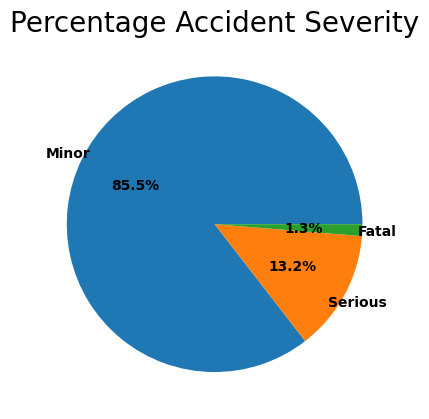

<Figure size 2000x2000 with 0 Axes>

In [121]:
#Percent Accident Severity using pie chart 
mylabels = ['Minor','Serious','Fatal']
plt.title('Percentage Accident Severity',fontdict={'fontsize':20})
plt.pie(data['Accident_Severity'].value_counts(),labels = mylabels,startangle = 0,autopct=lambda p: '{:.1f}%'.format(p) if p > 0 else '',
       textprops={'color': 'Black', 'fontsize': 10, 'weight': 'bold', 'horizontalalignment': 'center', 'verticalalignment': 'center'})
plt.figure(figsize=[20,20])

plt.show()



In [149]:
# Calculate the average casulality at different range of Speed_limit
data['Speed_limit'].value_counts()
speed_casualties = data.groupby(['Speed_limit']).agg({'Number_of_Casualties':'mean'}).round(2)
speed_casualties.rename(columns={'Number_of_Casualties':'Average_Casualties'}).reset_index()


,Speed_limit,Average_Casualties
0,10,1.33
1,15,1.50
2,20,1.19
3,30,1.28
4,40,1.45
5,50,1.51
6,60,1.52
7,70,1.57


In [197]:
speed_bins = [0,10,20,30,40,50,60,70,80]
speed_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
speed_casualties['Speed Range'] = pd.cut(speed_casualties.index,bins=speed_bins,labels = speed_labels,right=True)
Speed_range = speed_casualties.groupby('Speed Range').agg({'Number_of_Casualties':'mean'}).round(2).reset_index()
Speed_range

,Speed Range,Number_of_Casualties
0,0-10,1.33
1,11-20,1.34
2,21-30,1.28
3,31-40,1.45
4,41-50,1.51
5,51-60,1.52
6,61-70,1.57
7,71-80,NaN


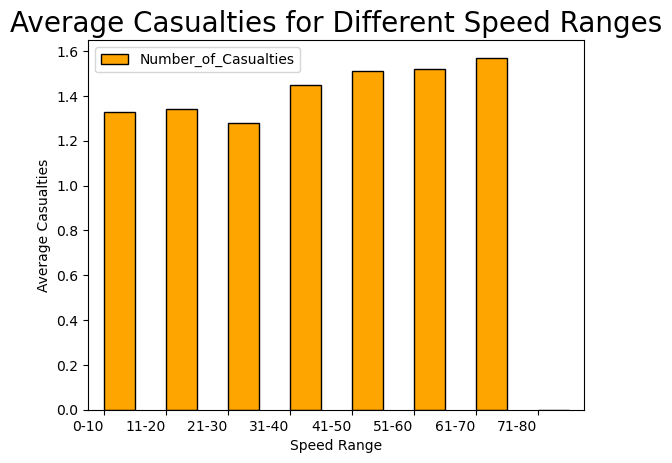

In [203]:
Speed_range.plot(kind='bar', x='Speed Range', y='Number_of_Casualties', color='orange', edgecolor='black',align ='edge')
plt.title('Average Casualties for Different Speed Ranges',fontdict={'fontsize':20})
plt.xlabel('Speed Range')
plt.ylabel('Average Casualties')
plt.xticks(rotation=0, ha='right')  # Adjust rotation and alignment of x-axis labels as needed
plt.show()

In [ ]:
# Assuming data is your DataFrame and 'Accident Date' is the column containing dates in 'd-m-Y' format
data['Accident Date'] = pd.to_datetime(data['Accident Date'], format='%d-%m-%Y')
# Extract month names
data['Month Name'] = data['Accident Date'].dt.strftime('%B')


In [244]:
# Group by month and count the number of casualties
monthly_data = data.groupby(['Month Name', data['Accident Date'].dt.to_period(freq='M')]).agg({'Number_of_Casualties': 'count'}).reset_index()
monthly_data = monthly_data.rename(columns={'Accident Date':'Accident Month'})
print("Monthly Data:")
monthly_data = monthly_data.sort_values(by='Accident Month').set_index('Accident Month')
monthly_data

Monthly Data:


,Month Name,Number_of_Casualties
Accident Month,,
2021-01,January,13417
2021-02,February,10950
2021-03,March,13202
2021-04,April,12715
2021-05,May,13811
2021-06,June,13936
2021-07,July,14300
2021-08,August,13415
2021-09,September,13792


In [242]:
monthly_data['Percentage_change'] = (monthly_data['Number_of_Casualties'].pct_change() *100).round(2).apply(lambda x:f'{x:.2f}%')

monthly_data['Percentage_change']=monthly_data['Percentage_change'].replace('nan%','No Record')
monthly_data

,Month Name,Number_of_Casualties,Percentage_change
Accident Month,,,
2021-01,January,13417,No Record
2021-02,February,10950,-18.39%
2021-03,March,13202,20.57%
2021-04,April,12715,-3.69%
2021-05,May,13811,8.62%
2021-06,June,13936,0.91%
2021-07,July,14300,2.61%
2021-08,August,13415,-6.19%
2021-09,September,13792,2.81%


In [247]:
# Group by Quarter and count the number of casualties
Quarter_data = data.groupby([data['Accident Date'].dt.to_period(freq='Q')]).agg({'Number_of_Casualties': 'count','Number_of_Casualties'}).reset_index()
Quarter_data = Quarter_data.rename(columns={'Accident Date':'Quarters'})
print("Quarter Data:")
Quarter_data

Quarter Data:


,Quarters,Number_of_Casualties
0,2021Q1,37569
1,2021Q2,40462
2,2021Q3,41507
3,2021Q4,44016
4,2022Q1,33243
5,2022Q2,36694
6,2022Q3,37701
7,2022Q4,36781


In [252]:
Quarter_data['Percentage Change'] = (Quarter_data['Number_of_Casualties'].pct_change()*100).round(2).apply(lambda x:f'{x:.2f}%').replace('nan%','No Record')
Quarter_data

,Quarters,Number_of_Casualties,Percentage Change
0,2021Q1,37569,No Record
1,2021Q2,40462,7.70%
2,2021Q3,41507,2.58%
3,2021Q4,44016,6.04%
4,2022Q1,33243,-24.48%
5,2022Q2,36694,10.38%
6,2022Q3,37701,2.74%
7,2022Q4,36781,-2.44%


In [254]:
data['Light_Conditions'].value_counts()

Light_Conditions
Daylight    227286
Darkness     80687
Name: count, dtype: int64

In [314]:
# Location and region with higher incidence of accidents
data.columns
Location = data.groupby(data['Local_Authority_(District)']).agg({'Accident_Index':'count'}).sort_values(by = 'Accident_Index',ascending = False).head(10)
print("Top 10 Districts with Maximum number of Accidents")
Location.rename(columns={'Accident_Index':"Total Accidents"}).reset_index()




Top 10 Districts with Maximum number of Accidents


,Local_Authority_(District),Total Accidents
0,Birmingham,6165
1,Leeds,4140
2,Manchester,3132
3,Bradford,3006
4,Westminster,2811
5,Sheffield,2750
6,Liverpool,2611
7,Cornwall,2606
8,Barnet,2302
9,"Bristol, City of",2270


In [326]:
# Specific junction types or road conditions associate with high number of accidents
junction_road_accidents = data[['Junction_Detail','Road_Surface_Conditions','Accident_Index']]
jra_pivot = pd.pivot_table(junction_road_accidents,index='Junction_Detail',columns='Road_Surface_Conditions',values='Accident_Index',fill_value=0,aggfunc='count')
print("Pivot Table representing the Number of Accidents happen in specific Junction type and Road Surface Condition")
jra_pivot

Pivot Table representing the Number of Accidents happen in specific Junction type and Road Surface Condition


Road_Surface_Conditions,Damp,Dry,Frosty,Other,Snowy,Wet
Junction_Detail,,,,,,
Crossroads,9,21263,633,15,294,7734
Mini-roundabout,0,2273,99,2,49,923
More than 4 arms (not roundabout),0,2929,90,4,40,1085
Not at junction or within 20 metres,293,78508,7307,116,2617,34253
Other junction,5,5647,291,6,115,2251
Private drive or entrance,7,7859,200,20,95,2694
Roundabout,9,19232,642,37,258,7086
Slip road,12,2767,170,1,80,1235
T or staggered junction,39,68488,2646,116,1210,24218


In [329]:
data.columns

Index(['Accident_Index', 'Accident Date', 'Day_of_Week', 'Junction_Control',
       'Junction_Detail', 'Accident_Severity', 'Latitude', 'Longitude',
       'Light_Conditions', 'Local_Authority_(District)', 'Carriageway_Hazards',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Speed_limit', 'Time',
       'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type',
       'Month Name'],
      dtype='object')